In [14]:
import numpy as np  
import pandas as pd  
  
import matplotlib.pyplot as plt  
%matplotlib inline  

import seaborn as sns  
  
from sklearn.decomposition import PCA  
  
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  
  
from sklearn.metrics import accuracy_score  
from sklearn.metrics import precision_score, recall_score, f1_score  
  
import pickle   
  
import warnings  
warnings.filterwarnings('ignore')

In [15]:
students=pd.read_csv("dataset.csv")

In [16]:
students.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [19]:
students.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [18]:
from sklearn.preprocessing import LabelEncoder

In [5]:
students.rename(columns = {"Nacionality": "Nationality", 
                           "Mother's qualification": "Mother_qualification", 
                           "Father's qualification": "Father_qualification", 
                           "Mother's occupation": "Mother_occupation",
                           "Father's occupation": "Father_occupation", 
                           "Age at enrollment": "Age"}, inplace = True)

students.columns = students.columns.str.replace(' ', '_')

students.columns = students.columns.str.replace('(', '')
students.columns = students.columns.str.replace(')', '')

In [6]:
col = ['Marital_status', 'Application_mode', 'Application_order', 'Course',
      'Daytime/evening_attendance', 'Previous_qualification', 'Nationality',
       'Mother_qualification', 'Father_qualification', 'Mother_occupation',
       'Father_occupation', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
      'International', 'Target']

students[col] = students[col].astype('category')


In [ ]:
students.head()

In [8]:
students['TARGET'] = OrdinalEncoder(categories = [['Dropout', 'Enrolled', 'Graduate']]).fit_transform(students[['Target']])

students.drop('Target', axis = 1, inplace = True)

In [12]:
cats = ['Marital_status', 'Application_mode', 'Application_order', 
        'Course','Daytime/evening_attendance', 'Previous_qualification', 
        'Nationality','Mother_qualification', 'Father_qualification', 
        'Mother_occupation', 'Father_occupation', 'Displaced', 
        'Educational_special_needs', 'Debtor','Tuition_fees_up_to_date', 
        'Gender', 'Scholarship_holder','International']

In [10]:
stud_selected = students.drop(['Nationality', 'International', 'Educational_special_needs'], 
                              axis = 1)

In [36]:
X=df.drop('Target',axis=1)
y=df['Target']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)  
print(X_train.shape)  
print(X_test.shape)  
print(y_train.shape)  
print(y_test.shape)

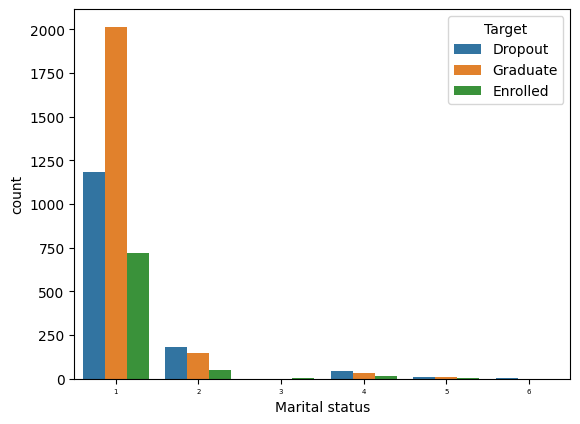

In [20]:
sns.countplot(x='Marital status', hue='Target', data=students)
plt.xticks(fontsize=5)
plt.show()

In [21]:
students['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64